<h1><center><font color = "red">Jupyter Notebook for Convolutional Neural Network Implementation in Keras</font></center></h1>

## Dataset Information:

•	Let us take a very famous dataset for handwritten digit classification called as MNIST (Modified National Institue of Standards and Technology) dataset

•	It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9. 
The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

<h3><center><font color = "red">MNIST Dataset Example</font></center></h3>

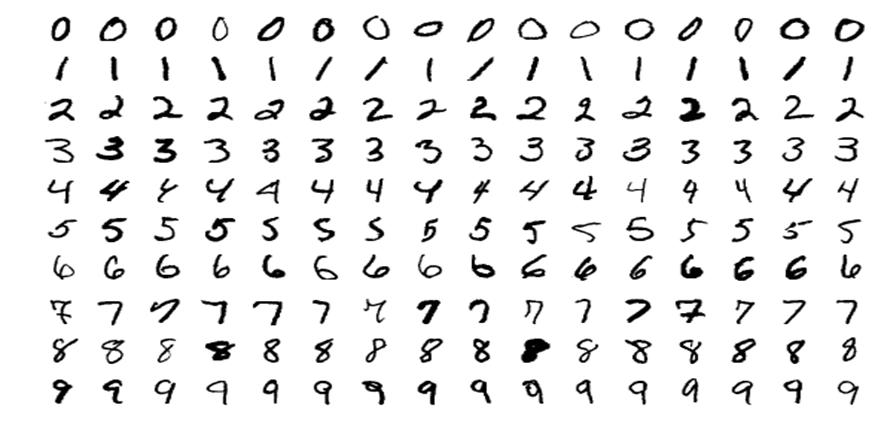

## Step 1. Loading Dataset from Keras

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_labels

## Step 2. Visualizing Few Digits from MNIST Dataset

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

#### From the above cell it is inferred that the input images are stored in Numpy tensors of shape (60000, 28, 28) for training data and of shape (10000, 28, 28) for test data, respectively.

In [ ]:
fig=plt.figure(figsize=(12,8), dpi= 100)
# plot first nine images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    
# show the figure
plt.show()

## Step 3. Defining Model Using Keras

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#### Importantly, a convnet takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension). In this case, we’ll configure the convnet to process inputs of size (28, 28, 1), which is the format of MNIST images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first layer.

#### Let’s display the architecture of the convnet so far:

In [ ]:
model.summary()

#### You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of channels is controlled by the first argument passed to the Conv2D layers (32 or 64).

#### The next step is to feed the last output tensor (of shape (3, 3, 64)) into a densely connected classifier network like those you’re already familiar with: a stack of Dense layers. These classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. First we have to flatten the 3D outputs to 1D, and then add a few Dense layers on top.

## Step 4. Adding Classifier on Top of the Convnet

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We’ll do 10-way classification, using a final layer with 10 outputs and a softmax activation.
Here’s what the network looks like now:

In [ ]:
model.summary()

As you can see, the (3, 3, 64) outputs are flattened into vectors of shape (576,)
before going through two Dense layers.

Let us train the Convnet on the MNIST digits.

## Step 5. Compiling Model

In [ ]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


train_labels

In [ ]:
# compiling model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Step 6. Fitting Model on Training Data

In [ ]:
# fitting model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

## Step 7. Model Evaluation on Test Data

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

## NOT BAD :)

## Task for you:

### Develop a CNN model to classify images into predefined categories using Keras.

#### Dataset:
Use the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

Data Link: https://www.cs.toronto.edu/~kriz/cifar.html